In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib

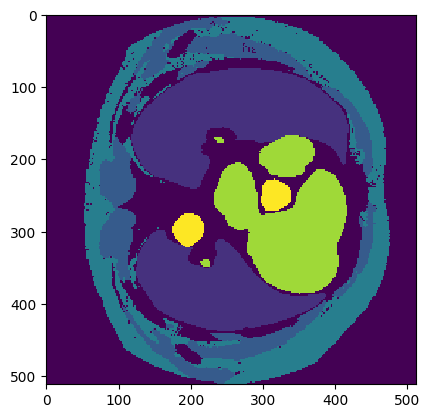

In [2]:
#Available masks: muslce, fat, all lung lobes, liver, heart, aorta, kidneys
llll = nib.load("/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/B30f_B50f/hard_masked/122924/segmentations/lung_lower_lobe_left.nii.gz")
lllr = nib.load("/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/B30f_B50f/hard_masked/122924/segmentations/lung_lower_lobe_right.nii.gz")
lull = nib.load("/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/B30f_B50f/hard_masked/122924/segmentations/lung_upper_lobe_left.nii.gz")
lulr = nib.load("/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/B30f_B50f/hard_masked/122924/segmentations/lung_upper_lobe_right.nii.gz")
lulm = nib.load("/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/B30f_B50f/hard_masked/122924/segmentations/lung_middle_lobe_right.nii.gz")
skeletal_muscle = nib.load("/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/B30f_B50f/hard_masked/122924/segmentations/skeletal_muscle.nii.gz")
fat = nib.load("/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/B30f_B50f/hard_masked/122924/segmentations/subcutaneous_fat.nii.gz")
liver = nib.load("/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/B30f_B50f/hard_masked/122924/segmentations/liver.nii.gz")
heart = nib.load("/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/B30f_B50f/hard_masked/122924/segmentations/heart.nii.gz")
aorta = nib.load("/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/B30f_B50f/hard_masked/122924/segmentations/aorta.nii.gz")
kidney_left = nib.load("/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/B30f_B50f/hard_masked/122924/segmentations/kidney_left.nii.gz")
kidney_right = nib.load("/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/B30f_B50f/hard_masked/122924/segmentations/kidney_right.nii.gz")
pancreas = nib.load("/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/B30f_B50f/hard_masked/122924/segmentations/pancreas.nii.gz")

llll_data = llll.get_fdata()
lllr_data = lllr.get_fdata()
lull_data = lull.get_fdata()
lulr_data = lulr.get_fdata()
lulm_data = lulm.get_fdata()
skeletal_muscle_data = skeletal_muscle.get_fdata()
fat_data = fat.get_fdata()
liver_data = liver.get_fdata()
heart_data = heart.get_fdata()
aorta_data = aorta.get_fdata()
kidney_left_data = kidney_left.get_fdata()
kidney_right_data = kidney_right.get_fdata()
pancreas_data = pancreas.get_fdata()

#Combine all lung lobes to make a single mask
mask = np.zeros_like(llll_data)
mask[llll_data == 1] = 1
mask[lllr_data == 1] = 1
mask[lull_data == 1] = 1
mask[lulr_data == 1] = 1
mask[lulm_data == 1] = 1
mask[skeletal_muscle_data == 1] = 2
mask[fat_data == 1] = 3
mask[liver_data == 1] = 4
mask[kidney_left_data == 1] = 5
mask[kidney_right_data == 1] = 5
mask[heart_data == 1] = 6
mask[aorta_data == 1] = 7
mask[pancreas_data == 1] = 8

#Plot the mask
plt.imshow(mask[:,:,74])
plt.show()

In [3]:
nifti_mask = nib.Nifti1Image(mask, llll.affine)
nib.save(nifti_mask, "mask.nii.gz")

In [7]:
#check data type 
print(llll_data.dtype)
print(mask.dtype)

float64
float64
